# Chapter 2 Statistical Learning

In this chapter, we will get a brief idea of statistical learning from the following aspects:
- 2.1 function f and error term
  - why: prediction vs inference
  - how: parametric methods vs non-parametric methods
  - trade-off: flexibility vs interpretability 
  - supervised vs unsupervised learning
  - regression vs classification
- 2.2 model accuracy 
  - flexibility vs accuracy
  - trade-off: bias and variance

In [123]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.interpolate
import matplotlib.pyplot as plt

import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn import linear_model

%matplotlib inline
plt.style.use('seaborn-white')

In [6]:
# Load datasets
advertising = pd.read_csv('Data/Advertising.csv', usecols=[1,2,3,4])
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
radio        200 non-null float64
newspaper    200 non-null float64
sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
income1 = pd.read_csv('Data/Income1.csv', usecols=[1,2])
income1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
Education    30 non-null float64
Income       30 non-null float64
dtypes: float64(2)
memory usage: 552.0 bytes


In [8]:
income2 = pd.read_csv('Data/Income2.csv', usecols=[1,2,3])
income2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
Education    30 non-null float64
Seniority    30 non-null float64
Income       30 non-null float64
dtypes: float64(3)
memory usage: 792.0 bytes


## 2.1 Function f and error term

### Figure 2.1 - Display of Advertising dataset
A simple example of applying statistical learning in business.

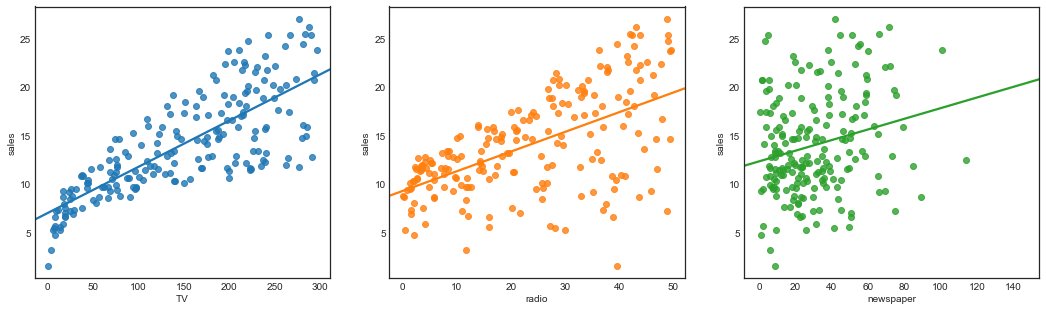

In [42]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,5))

# Left plot
sns.regplot(advertising.TV, advertising.sales, ci=None, ax=ax1)

# Middle plot
sns.regplot(advertising.radio, advertising.sales, ci=None, ax=ax2)

# Right plot
sns.regplot(advertising.newspaper, advertising.sales, ci=None, ax=ax3)

fig.show()

### Figure 2.2 - True relationship and error (p=1)
An illustration of function Y = f(X) + error in one predictor setting. 

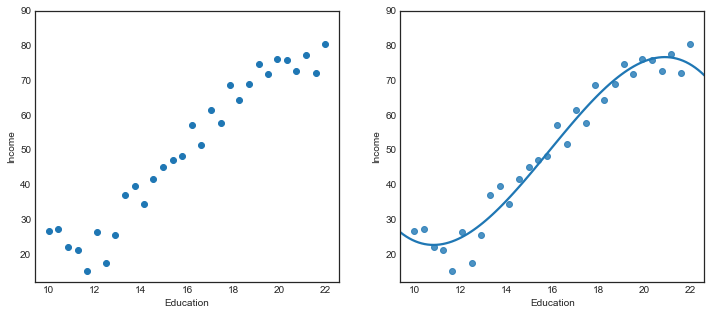

In [61]:
fig, (ax1,ax2 ) = plt.subplots(1,2, figsize=(12,5))

# Left
ax1.scatter(income1.Education, income1.Income)

# Right
sns.regplot(income1.Education, income1.Income, order=3, ci=None, ax=ax2)

for ax in fig.axes:
    ax.set_xlabel('Education')
    ax.set_ylabel('Income')
    ax.set_ylim(ymax=90)

### Figure 2.3 - True relationship and error (p=2)
An illustration of function Y = f(X) + error in two predictor setting. 

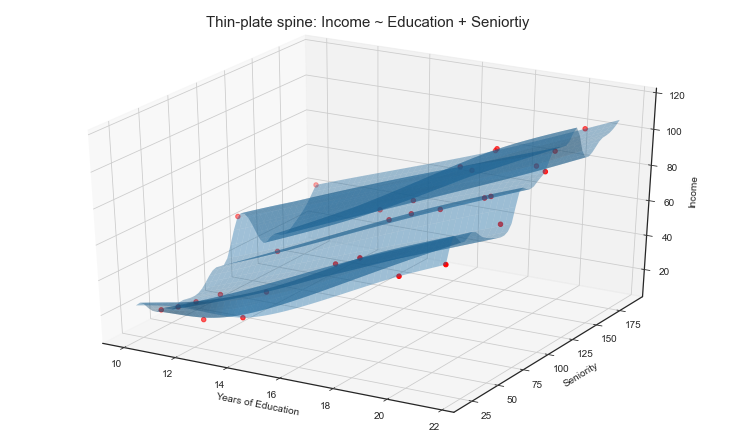

In [129]:
x, y, z = income2.Education, income2.Seniority, income2.Income
# 2D grid construction
spline = sp.interpolate.Rbf(x,y,z,function='thin-plate')
xi = np.linspace(min(x), max(x))
yi = np.linspace(min(y), max(y))
X, Y = np.meshgrid(xi, yi)
# interpolation
Z = spline(X,Y)

fig = plt.figure(figsize=(10, 6))
fig.suptitle('Thin-plate spine: Income ~ Education + Seniortiy', fontsize=15)
ax = Axes3D(fig)
ax.scatter3D(x, y, z, s=20, c='r')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, alpha=0.4)

ax.set_xlabel('Years of Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')

plt.show()

### Figure 2.4-2.5 Parametric methods 
A linear model fit by least squares

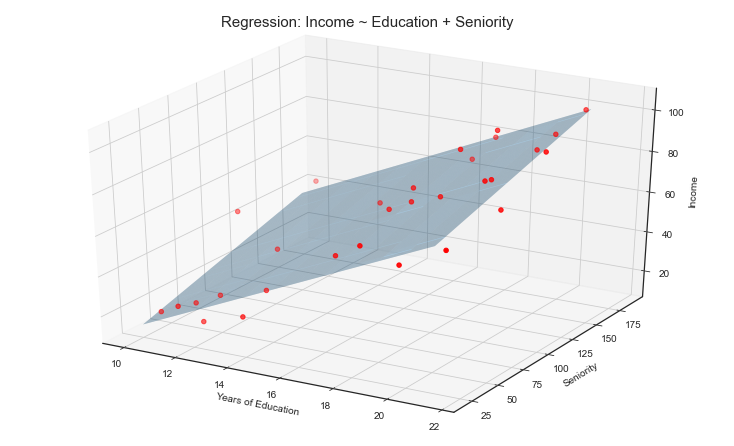

In [139]:
x, y, z = income2.Education, income2.Seniority, income2.Income
X = income2[['Education', 'Seniority']].as_matrix()
ols = linear_model.LinearRegression()
ols.fit(X, z)

Education = np.arange(10, 22)
Seniority = np.arange(25, 175)
X, Y = np.meshgrid(Education, Seniority, indexing='xy')
Z = np.zeros((Seniority.size, Education.size))
for (i,j),v in np.ndenumerate(Z):
        Z[i,j] =(ols.intercept_ + X[i,j]*ols.coef_[0] + Y[i,j]*ols.coef_[1])

fig = plt.figure(figsize=(10,6))
fig.suptitle('Regression: Income ~ Education + Seniority', fontsize=15)
ax = Axes3D(fig)
ax.scatter3D(x, y, z, s=20, c='r')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1, linewidth=1, alpha=0.4)

ax.set_xlabel('Years of Education')
ax.set_ylabel('Seniority')
ax.set_zlabel('Income')
plt.show()